In [1]:
# Assignment No.01
# Deokar Shraddha Sunil
# TY - B - 153

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Display first 5 rows
print("First 5 Rows:")
print(df.head())

# Dataset shape
print("\nDataset Shape:", df.shape)

# Dataset info
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 Rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionL


Class Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


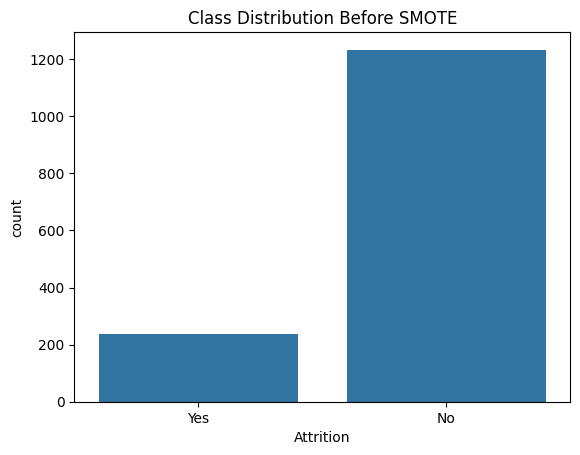

In [3]:
# Count class distribution
print("\nClass Distribution:")
print(df['Attrition'].value_counts())

# Visualize class imbalance
plt.figure()
sns.countplot(x='Attrition', data=df)
plt.title("Class Distribution Before SMOTE")
plt.show()


In [4]:
# Convert target variable to numeric
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Convert categorical columns using get_dummies
X = pd.get_dummies(X, drop_first=True)

print("Processed Shape:", X.shape)


Processed Shape: (1470, 47)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (1029, 47)
Testing Shape: (441, 47)


In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_smote.value_counts())


Before SMOTE:
 Attrition
0    863
1    166
Name: count, dtype: int64

After SMOTE:
 Attrition
0    863
1    863
Name: count, dtype: int64


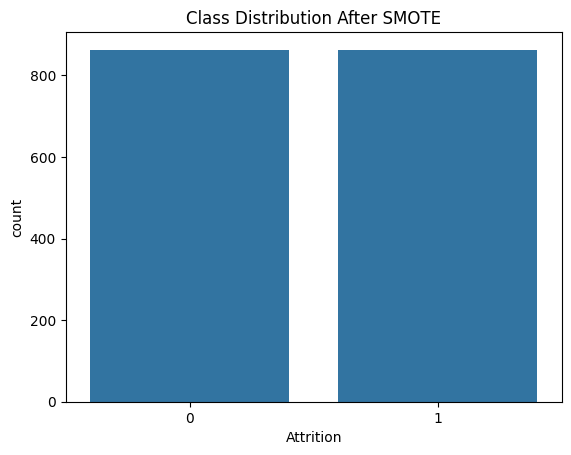

In [7]:
plt.figure()
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)


C:\Users\shrad\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7687074829931972

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       370
           1       0.34      0.46      0.39        71

    accuracy                           0.77       441
   macro avg       0.61      0.65      0.62       441
weighted avg       0.80      0.77      0.78       441

